# Análise de dados para identificar possíveis fraudes em cartões bancários




## Prof. Dra. Isadora Ferrão
Redes sociais:
*   https://www.instagram.com/isadora.ferrao/
*   https://www.linkedin.com/in/isadora-ferrao/


# Credit Card Fraud Detection

 **Problema**: É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas de cartão de crédito para que os clientes não sejam cobrados por itens que não compraram. Fraude é qualquer ação deliberada de enganar ou ludibriar em benefício próprio (ex.: uso indevido de cartão de crédito).

 **Solução**: A análise de dados ajuda a combater fraudes ao identificar comportamentos atípicos (outliers) em grandes volumes de transações. Por meio de técnicas estatísticas e de aprendizado de máquina, é possível detectar padrões suspeitos e alertar sobre possíveis fraudes de forma mais rápida e precisa, reduzindo perdas financeiras e melhorando a segurança.

**Disponível em**: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartão europeus. Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes de 284.807 transações. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) é responsável por 0,172% de todas as transações.



# Importação das bibliotecas



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Para balanceamento
!pip install imbalanced-learn --quiet
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Carregamento do dataset

In [22]:
# Carregar o dataset (ajuste o caminho local conforme necessário)
df = pd.read_csv('creditcard.csv')

# Ver as 5 primeiras linhas
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [23]:
# Informações gerais do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
# Resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Análise Exploratória

A variável "Class" é uma variável categórica binária que classifica cada registro como sendo uma fraude (1) ou não sendo uma fraude (0). Vamos contar números de fraudes e não fraudes a partir dos valores trazidos pela variável Class:

In [25]:
# Contagem de fraudes vs não fraudes
print("=== Distribuição da variável 'Class' ===")
print(df['Class'].value_counts())
num_fraudes = df[df['Class'] == 1].shape[0]
num_legit = df[df['Class'] == 0].shape[0]
print(f"Fraudes: {num_fraudes}, Não Fraudes: {num_legit}")
print(f"Proporção de fraudes: {100 * num_fraudes / (num_fraudes + num_legit):.4f}%\n")

=== Distribuição da variável 'Class' ===
Class
0    284315
1       492
Name: count, dtype: int64
Fraudes: 492, Não Fraudes: 284315
Proporção de fraudes: 0.1727%



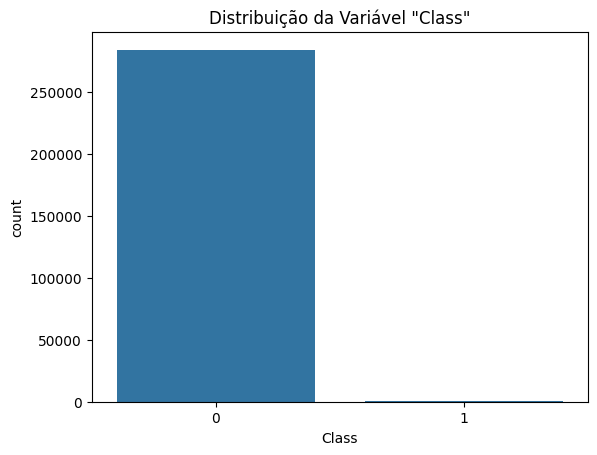

In [26]:
# Plot de distribuição: Fraudes vs Não Fraudes
sns.countplot(x='Class', data=df)
plt.title('Distribuição da Variável "Class"')
plt.show()

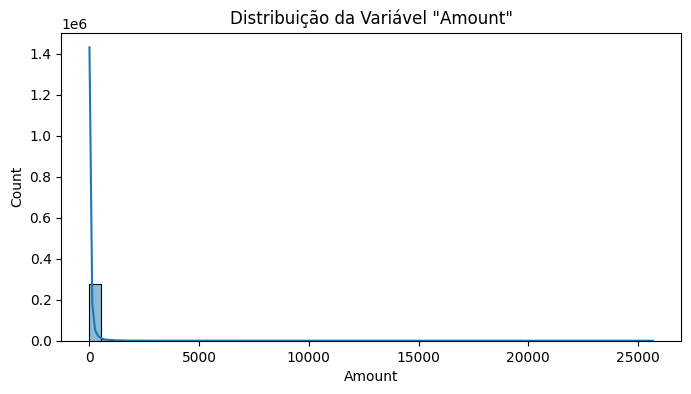

In [27]:
# Distribuição do 'Amount'

plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribuição da Variável "Amount"')
plt.show()


# Pré-Processamento

 Esse código normaliza a coluna "Amount" usando o método StandardScaler do scikit-learn, criando uma nova coluna "Amount_Scaled" no conjunto de dados df. Além disso, ele separa as colunas do conjunto de dados em X (recursos) e y (variável alvo), preparando-os para serem usados em um modelo de aprendizado de máquina.

In [28]:
#Normalização

# Normalizar a coluna Amount
from sklearn.preprocessing import StandardScaler


df['Amount_Scaled'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1)) #criando nova coluna de nome Amount_Scaled. Usando método fit_transform da classe StandardScaler do módulo sklearn.preprocessing que transforma os dados para ter média 0 e desvio padrão 1.O reshape transforma a coluna Amount de 1D para 2D.

X= df.drop(['Class', 'Amount', 'Time'], axis=1) #criando X composto de todas as colunas do df exceto Class, Amount e Time
y= df['Class'] #criando y apenas com a coluna target Class



In [ ]:
#Exemplo:
# Reduzindo o tamanho do dataset para testes mais rápidos:

## OBS: descomentar essa parte se você quiser executar o SMOTE + RandomForest mais rápido
#from sklearn.preprocessing import StandardScaler

# Reduzindo o tamanho do dataset para testes mais rápidos
#df_sample = df.sample(frac=0.1, random_state=42)  # Usa 10% dos dados

# Normalizar a coluna Amount no dataset reduzido
#df_sample['Amount_Scaled'] = StandardScaler().fit_transform(df_sample[['Amount']])

# Separando X (features) e y (variável alvo)
#X = df_sample.drop(columns=['Time', 'Amount', 'Class'])  # Remove 'Time', 'Amount' e a coluna-alvo
#y = df_sample['Class']

## Detecção de Fraudes (Outliers) com Isolation Forest

A Isolation Forest é um algoritmo específico para detecção de anomalias (outliers). Ele “isola” pontos que são poucos frequentes ou têm características muito diferentes do restante dos dados. É útil aqui porque não exige rótulos para treinar: pode ser aplicado como um método não supervisionado.

Esse código treina um modelo usando o algoritmo Isolation Forest para detecção de fraudes, faz previsões sobre os registros no conjunto de dados X e armazena os resultados em uma nova coluna chamada "IF_Pred" no conjunto de dados df. Além disso, ele converte os valores de previsão para que 1 represente fraude e 0 represente não fraude.

In [29]:
print("=== Detecção de Fraudes com Isolation Forest ===")

Contamination_rate = 0.0017
iso_forest = IsolationForest(n_estimators=100, contamination=Contamination_rate, random_state=42)

# O parâmetro n_estimators=100 define o número de árvores de decisão a serem usadas no modelo.
# O parâmetro contamination=Contamination_rate define a taxa de contaminação esperada.
# O parâmetro random_state=42 define a semente aleatória para reprodutibilidade.

iso_forest.fit(X) # treina o modelo Isolation Forest usando os recursos (features) armazenados no conjunto de dados X.
df['IF_Pred'] = iso_forest.fit_predict(X)
#Essa linha usa o modelo treinado para fazer previsões sobre os registros no conjunto de dados X.
#As previsões são armazenadas em uma nova coluna chamada "IF_Pred" no conjunto de dados df.
#O método fit_predict() retorna -1 para registros considerados anomalias (fraudes) e 1 para registros considerados normais (não fraudes).

df['IF_Pred'] = df['IF_Pred'].map({1:0, -1:1})
#Essa linha converte os valores de previsão de -1 e 1 para 1 (fraude) e 0 (não fraude), respectivamente.
#Isso é feito para que os valores de previsão fiquem alinhados com a convenção de 1 para fraude e 0 para não fraude, que é comumente usada em problemas de detecção de fraude.


=== Detecção de Fraudes com Isolation Forest ===


In [30]:
#Visualizando novo conjunto de dados df com coluna IF_Pred que retorna 0= não fraude e 1= fraude
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled,IF_Pred
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249,0


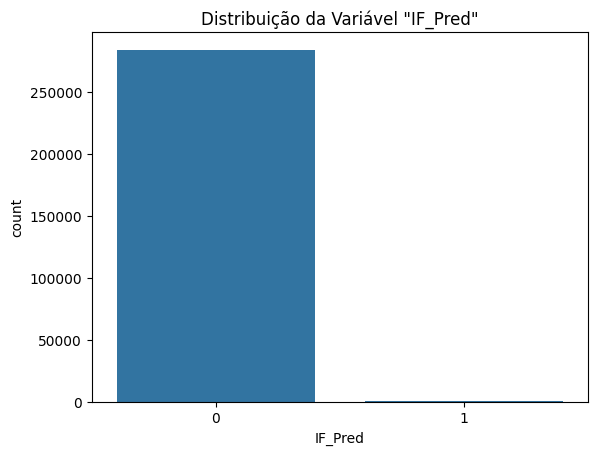

In [31]:
# Plot de distribuição: Fraudes vs Não Fraudes
sns.countplot(x='IF_Pred', data=df)
plt.title('Distribuição da Variável "IF_Pred"')
plt.show()

In [32]:
# Contagem de fraudes vs não fraudes
print("=== Distribuição da variável 'IF_Pred' ===")
print(df['IF_Pred'].value_counts())
num_fraudes_pred = df[df['IF_Pred'] == 1].shape[0]
num_legit_pred = df[df['IF_Pred'] == 0].shape[0]
print(f"Fraudes: {num_fraudes_pred}, Não Fraudes: {num_legit_pred}")
print(f"Proporção de fraudes: {100 * num_fraudes_pred / (num_fraudes_pred + num_legit_pred):.4f}%\n")

=== Distribuição da variável 'IF_Pred' ===
IF_Pred
0    284322
1       485
Name: count, dtype: int64
Fraudes: 485, Não Fraudes: 284322
Proporção de fraudes: 0.1703%



Contamination_rate = 0.0017

A proporção de fraudes no conjunto de dados é de 0,2041%. Ou seja, apenas 0,2041% dos registros são classificados como fraudes.

Tendo em vista essa baixa proporção de fraudes, o valor de Contamination_rate = 0.0017 (0,17%) utilizado no código anterior parece ser uma escolha razoável. Esse valor é próximo à proporção real de fraudes encontrada nos dados, o que pode ajudar o modelo de Isolation Forest a identificar corretamente os registros fraudulentos.

Outros valores de Contamination_rate também poderiam ser válidos, dependendo da natureza do problema e do conjunto de dados. Por exemplo:

Se a proporção de fraudes fosse ainda menor, um valor ainda mais baixo, como 0.001 (0,1%), poderia ser mais adequado.
Se a proporção de fraudes fosse maior, um valor mais alto, como 0.005 (0,5%) ou 0.01 (1%), poderia ser mais apropriado.
A escolha do valor ideal de Contamination_rate geralmente envolve um processo de experimentação e ajuste fino, levando em consideração o desempenho do modelo em identificar corretamente as fraudes e os falsos positivos. É importante encontrar um equilíbrio entre a taxa de detecção de fraudes e a taxa de falsos positivos, de acordo com as necessidades do problema.

Portanto, o valor de 0.0017 (0,17%) parece ser uma escolha razoável para o cenário apresentado, dada a baixa proporção de fraudes no conjunto de dados. No entanto, outros valores também poderiam ser válidos, dependendo das características específicas do problema de detecção de fraude.

In [33]:
#Verificando número de valores nulos em cada coluna (coluna do dataframe y que é a target Class e a coluna nova gerada IF_Pred)
print("Valores faltantes em target:", y.isnull().sum())
print("Valores faltantes em df['IF_Pred']:", df['IF_Pred'].isnull().sum())

#retornou 1 valor nulo na target Class (y)


Valores faltantes em target: 0
Valores faltantes em df['IF_Pred']: 0


In [34]:
# Remover entradas com NaN (nulas nessas colunas)
mask = y.notnull() & df['IF_Pred'].notnull()
#Essa linha cria uma máscara booleana (mask) que identifica as linhas onde tanto a variável y quanto a coluna 'IF_Pred' do dataframe df não possuem valores nulos (NaN).
#O operador & (e lógico) é usado para combinar as condições y.notnull() e df['IF_Pred'].notnull(), criando uma máscara que seleciona apenas as linhas com valores válidos em ambas as colunas.


## Avaliação do Modelo

Matriz de Confusão:
Verdadeiros Negativos (TN): 283969
Falsos Positivos (FP): 346
Falsos Negativos (FN): 353
Verdadeiros Positivos (TP): 139


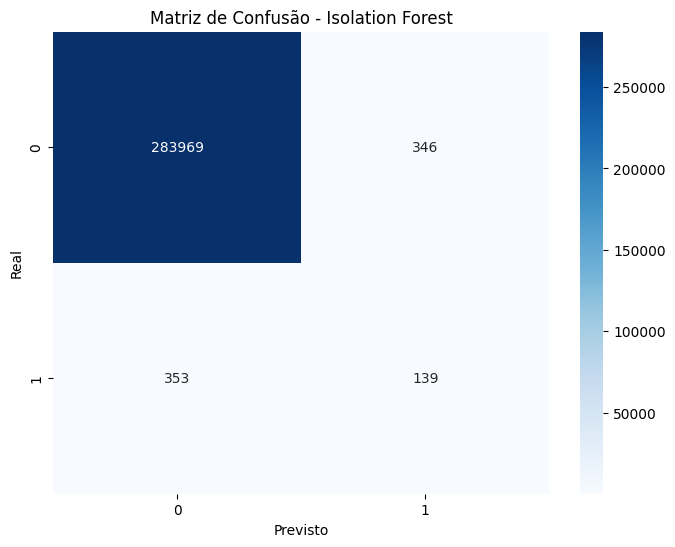


Métricas de Desempenho:
Acurácia: 1.00
Precisão: 0.29
Recall: 0.28

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calcular a matriz de confusão
target_clean = y[mask]
pred_clean = df['IF_Pred'][mask]

#Essas duas linhas aplicam a máscara mask para selecionar apenas as linhas com valores válidos em y e df['IF_Pred'], respectivamente.
#target_clean agora contém os valores da variável alvo y apenas para as linhas selecionadas pela máscara.
#pred_clean contém os valores da coluna 'IF_Pred' apenas para as linhas selecionadas pela máscara.

cm = confusion_matrix(target_clean, pred_clean)
tn, fp, fn, tp = cm.ravel()

#Essas duas linhas calculam a matriz de confusão (confusion matrix) usando as variáveis target_clean e pred_clean.
#A matriz de confusão é uma tabela que resume o desempenho de um modelo de classificação, mostrando o número de verdadeiros positivos (TP), falsos positivos (FP), falsos negativos (FN) e verdadeiros negativos (TN).
#A linha tn, fp, fn, tp = cm.ravel() extrai os valores individuais da matriz de confusão e os atribui às variáveis tn, fp, fn e tp, respectivamente.

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdadeiros Positivos (TP): {tp}")

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Isolation Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Calcular Acurácia, Precisão e Recall
accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

# Imprimir os resultados
print("\nMétricas de Desempenho:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Gerar o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(target_clean, pred_clean))

In [ ]:
# Calcular Acurácia, Precisão, Recall e F1 manualmente se quiser
"""accuracy_if = (tp + tn) / (tn + fp + fn + tp)
precision_if = tp / (tp + fp) if (tp+fp) > 0 else 0
recall_if = tp / (tp + fn) if (tp+fn) > 0 else 0
f1_if = (2 * precision_if * recall_if) / (precision_if + recall_if) if (precision_if + recall_if) else 0

print(f"Acurácia (IF): {accuracy_if:.4f}")
print(f"Precisão (IF): {precision_if:.4f}")
print(f"Recall (IF):   {recall_if:.4f}")
print(f"F1-Score (IF): {f1_if:.4f}")"""

## Validação Cruzada e Balanceamento
SMOTE + RandomForest

CONFIGURAÇÃO DO MODELO: PIPELINE --> SMOTE --> RANDOM FOREST

Um PIPELINE é criado que primeiro aplica o SMOTE para aumentar a classe minoritária (Esse método ajuda a aumentar a diversidade das amostras da classe minoritária, permitindo que o modelo aprenda melhor as características dessa classe.)e, em seguida, treina um RANDOM FOREST com 50 árvores (n_estimators=50) e profundidade máxima de 10 (max_depth=10).O Random Forest é um algoritmo de aprendizado de máquina que utiliza múltiplas árvores de decisão para melhorar a precisão da previsão. Ele combina os resultados de várias árvores para fazer uma previsão mais robusta.


CONFIGURAR K-FOLD ESTRATIFICADO: K-FOLD
O StratifiedKFold é configurado para dividir o conjunto de dados em 3 dobras, embaralhando os dados antes da divisão para garantir uma melhor aleatoriedade.

VALIDAÇÃO CRUZADA 1: CROSS_VALIDATE
A validação cruzada é uma técnica utilizada em aprendizado de máquina para avaliar a capacidade de generalização de um modelo. Ela ajuda a garantir que o modelo não esteja apenas se ajustando aos dados de treinamento, mas que também seja capaz de fazer previsões precisas.

A função cross_validate é utilizada para avaliar o pipeline configurado (model_pipeline) em relação aos dados X e rótulos y.
As métricas de avaliação incluem acurácia, precisão e recall, calculadas para cada dobra.

IMPRIMINDO RESULTADOS:ACURÁCIA, PRECISÃO, RECALL
As médias das métricas de desempenho (acurácia, precisão e recall) são calculadas e impressas, permitindo uma avaliação do desempenho do modelo.

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Configurar o modelo
model_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)), #Um pipeline é criado que primeiro aplica o SMOTE para aumentar a classe minoritária
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42))# Random Forest é treinado com 50 árvores (n_estimators=50) e profundidade máxima de 10 (max_depth=10).
])

# Configurar K-Fold estratificado
#O StratifiedKFold é configurado para dividir o conjunto de dados em 3 dobras,
# embaralhando os dados antes da divisão para garantir uma melhor aleatoriedade.

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Realizar a validação cruzada

scores = cross_validate(model_pipeline, X, y, cv=skf, scoring=['accuracy', 'precision', 'recall'])

# Imprimir os resultados
print(f"Acurácia média: {scores['test_accuracy'].mean():.2f}")
print(f"Precisão média: {scores['test_precision'].mean():.2f}")
print(f"Recall médio: {scores['test_recall'].mean():.2f}")


Acurácia média: 1.00
Precisão média: 0.49
Recall médio: 0.84


In [14]:
# Vamos avaliar Precision, Recall e F1 no CV
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

EXECUTANDO VALIDAÇÃO CRUZADA 2:

Esse código é uma implementação típica de validação cruzada em um pipeline de aprendizado de máquina, permitindo avaliar a eficácia do modelo de forma robusta e eficiente. Ele ajuda a garantir que o modelo generalize bem para dados que não foram vistos durante o treinamento, evitando o overfitting.

Diferença entre validação cruzada 1 e 2:

Código 1 é mais simples e direto, focando em métricas específicas.

Código 2 é mais configurável e eficiente, permitindo o uso de múltiplos núcleos e a possibilidade de definir métricas de avaliação em outro lugar no código.

In [15]:
# Executar a validação cruzada
results = cross_validate(model_pipeline, X, y,
                         scoring=scoring,
                         cv=skf,
                         return_train_score=False,
                         n_jobs=-1)

In [16]:
# Média das métricas
precision_cv = np.mean(results['test_precision'])
recall_cv = np.mean(results['test_recall'])
f1_cv = np.mean(results['test_f1'])

print(f"Precision (média 5-Fold): {precision_cv:.4f}")
print(f"Recall (média 5-Fold):    {recall_cv:.4f}")
print(f"F1-Score (média 5-Fold):  {f1_cv:.4f}")

Precision (média 5-Fold): 0.4861
Recall (média 5-Fold):    0.8415
F1-Score (média 5-Fold):  0.6159
